In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('./train.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


every column has nan values

In [3]:
titanic[titanic['Age'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 19 to 8685
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   178 non-null    object 
 1   HomePlanet    175 non-null    object 
 2   CryoSleep     175 non-null    object 
 3   Cabin         175 non-null    object 
 4   Destination   175 non-null    object 
 5   Age           178 non-null    float64
 6   VIP           172 non-null    object 
 7   RoomService   174 non-null    float64
 8   FoodCourt     176 non-null    float64
 9   ShoppingMall  172 non-null    float64
 10  Spa           175 non-null    float64
 11  VRDeck        173 non-null    float64
 12  Name          172 non-null    object 
 13  Transported   178 non-null    bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 19.6+ KB


178 entries with age == 0 is weird


In [4]:
titanic['total_expenses'] = titanic.FoodCourt + titanic.ShoppingMall + titanic.Spa + titanic.VRDeck + titanic.RoomService

titanic_t = titanic[titanic.Transported == True]
titanic_nt = titanic[titanic.Transported == False]

In [5]:
def histplt(vals: list):
    plt.figure(figsize=(10,10))
    plt.hist(vals, stacked=False, bins=20)
    plt.legend(['Transported', 'Not Transported'])

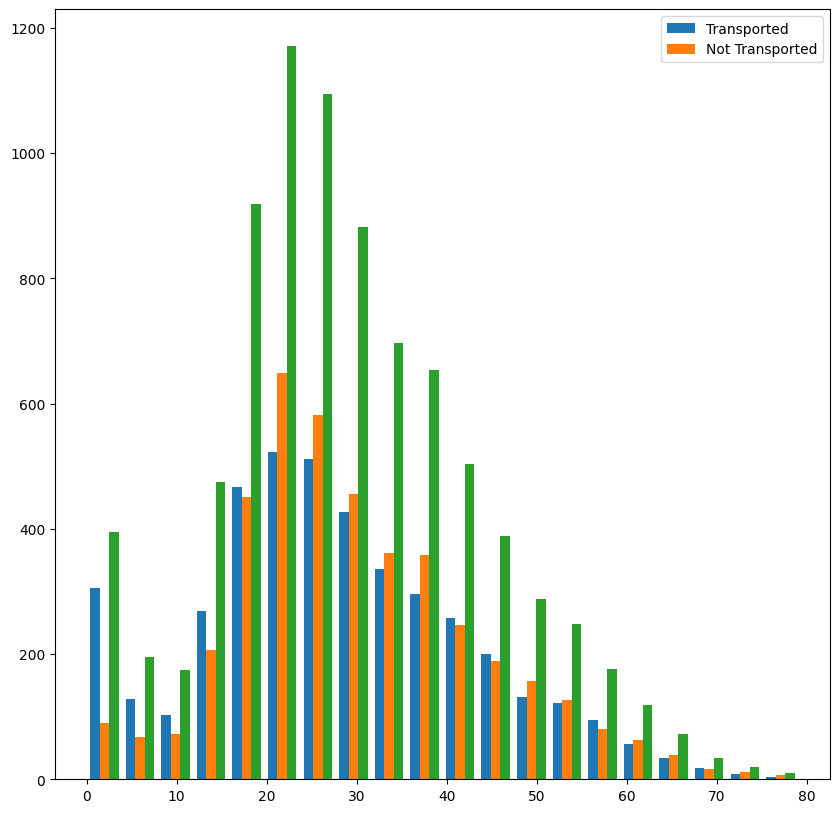

In [6]:
histplt([titanic_t.Age, titanic_nt.Age, titanic.Age])

below 20 more likely to get transported, equals out > ~60

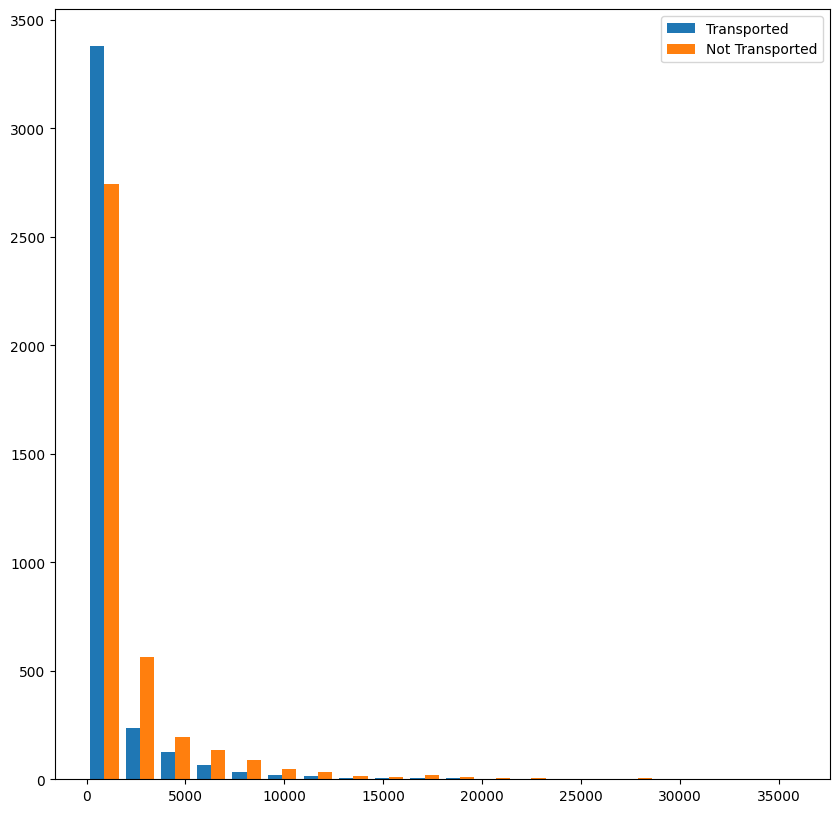

In [7]:
histplt([titanic_t.total_expenses, titanic_nt.total_expenses])

PassengerId       0.021491
CryoSleep         0.468645
Age              -0.075026
VIP              -0.037650
RoomService      -0.244611
FoodCourt         0.046566
ShoppingMall      0.010141
Spa              -0.221131
VRDeck           -0.207075
Transported       1.000000
total_expenses   -0.197671
Name: Transported, dtype: float64


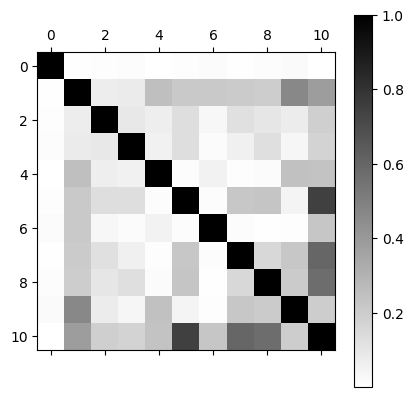

In [8]:
print(titanic.drop(['Name', 'Destination', 'HomePlanet', 'Cabin'], axis=1).corr()['Transported'])
h = plt.matshow(titanic.drop(['Name', 'Destination', 'HomePlanet', 'Cabin'], axis=1).corr().abs(), cmap='binary')
plt.colorbar(h)

cryosleep is a good feature, a

In [9]:
titanic[titanic['VIP'] == True].total_expenses.median()

2856.0

In [10]:
titanic[titanic['VIP'] == False].total_expenses.median()


722.0

<Axes: xlabel='Age', ylabel='total_expenses'>

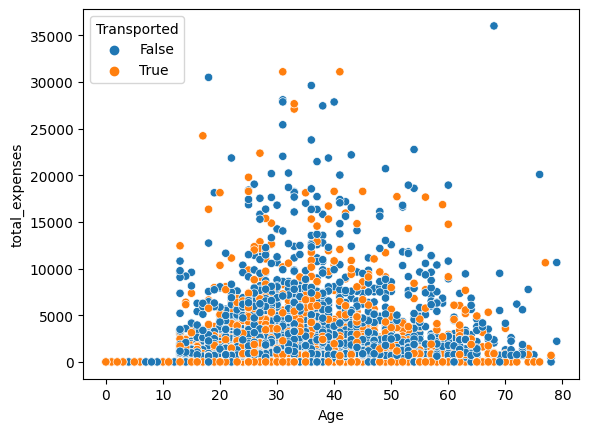

In [11]:
sns.scatterplot(titanic, x='Age', y='total_expenses', hue='Transported')

In [12]:
print(titanic[titanic['Age'] < 13].total_expenses.max())
print(titanic[titanic['Age'] < 14].total_expenses.max())


0.0
12439.0


therefore children below 13 arent allowed to spend
age na values where total expenses = 0 can be replaced by the mode of ages below 13

In [13]:
titanic[titanic['Age'] < 13].Age.mode()

0    0.0
Name: Age, dtype: float64

bruh lets do metdian instead

In [14]:
titanic[titanic['Age'] < 13].Age.median()

4.0